### CA1 Machine learning

## Model 1 Supervised Learning

# Import packages

In [228]:
#Import packages necessary for model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
# Import thi slibrary to suppress the warnings
import warnings
warnings.filterwarnings('ignore')   

## Abstract: 
This dataset is sythetic and concerns student academic performance and is from Kaggle (www.kaggle.com. (n.d.)). Student Performance (Multiple Linear Regression). [online] Available at: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression.
It contains the following data

 Hours Studied: The total number of hours spent studying by each student.
Previous Scores: The scores obtained by students in previous test.
Extracurricular Activities: Whether the student participates in extracurricular activities (/or o).
Sleep Hours: The average number of hours of sleep the student had p d

ay.
Sample Question Papers Practiced: The number of sample question papers the student practicle:

Performance Index: A measure of the overall performance ostudent representingresents the student's academc erf.orma
## Key Research Questions
Can we predict whether students will pass or fail their examination. 
To what extent d MachiDo the other variables impact on student perform model?

In [229]:
# Read Student Perfromance file
df_SP = pd.read_csv('Student_Performance.csv')



In [230]:
df_SP.shape

(10000, 6)

In [231]:
# Display first 5 records
df_SP.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [232]:
df_SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [233]:
# Description of the file
df_SP.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# Does the Data need to be wrangled?
- missing values - none see below
- covert string / categorical to numeric - yes extracurricular activities - see below
- need to be normalised / rescaled - no need - data falls within limited bounds - no possibilityof extreme  outliers.

In [234]:
# Check for missing values
missing_values = df_SP.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [235]:
# Find unique value for Extracurricular Activities
unique_classes, class_counts = np.unique(df_SP['Extracurricular Activities'], return_counts=True)

for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: Count = {count}")

Class No: Count = 5052
Class Yes: Count = 4948


In [236]:
#Replace non-numeric categorical data No with 0 and Yes with 1
df_SP['Extracurricular Activities'].replace('No',0,inplace=True)
df_SP['Extracurricular Activities'].replace('Yes',1,inplace=True)

In [237]:
# Check Extracurricular Activities field now 1 or 0  - Display first 5 records
df_SP.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


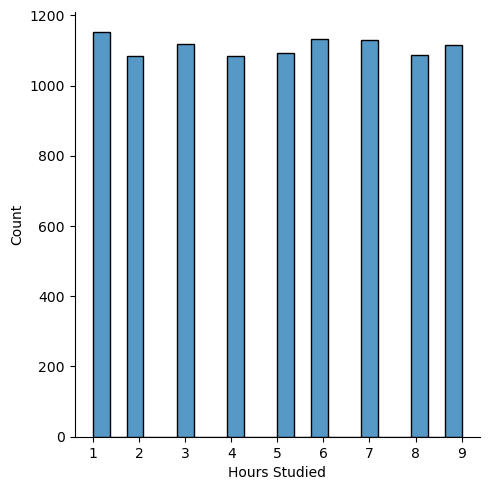

In [238]:
# Plot the Hours Studied
sns.displot(df_SP, x="Hours Studied")

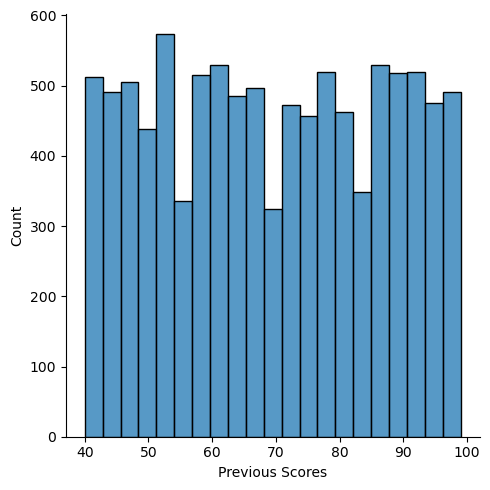

In [239]:
sns.displot(df_SP, x="Previous Scores")

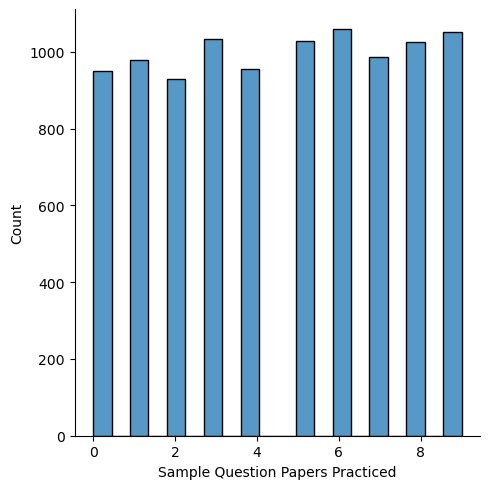

In [240]:
sns.displot(df_SP, x="Sample Question Papers Practiced")

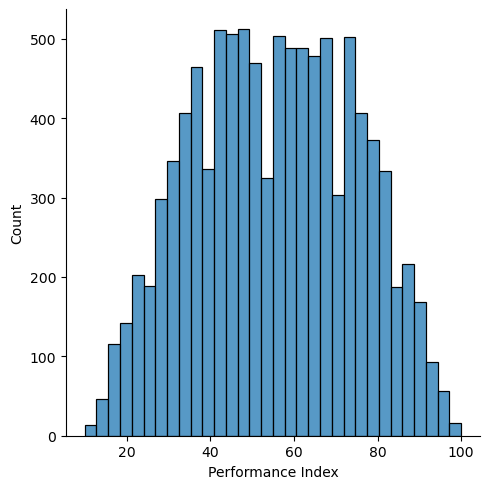

In [241]:
sns.displot(df_SP, x="Performance Index")

### Question 1 - can these variables predict whether a student passes or fails?
A = 90-100%
B = 80-90%
C = 70-79%
D = 60-69%
F = below 60%
Convert values below 60% to 0 and above to 1

In [242]:
df_SP

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [243]:
df_SP['PassFail'] = (df_SP['Performance Index'] > 60).astype(int)

print(df_SP)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Paper

In [244]:
# Setup new Datasets for SVC and Regression tests.
df_SPInd = df_SP.drop(['Performance Index','PassFail'], axis = 1)
df_SPDCon = df_SP['Performance Index']
df_SPDDis = df_SP['PassFail']
df_SPSleepPer = df_SP[['Sleep Hours','Performance Index']]
df_SPHSPer = df_SP[['Hours Studied','Performance Index']]
df_SPSQPPer = df_SP[['Sample Question Papers Practiced','Performance Index']]
df_SPPSPer = df_SP[['Previous Scores','Performance Index']]
# axis = 1 means along columnwise

In [251]:
#Display some records to confirm that the results are as expected 
#Display last 5 records
df_SPInd.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [252]:
df_SPSleepPer.head()

,Sleep Hours,Performance Index
0,9,91.0
1,4,65.0
2,7,45.0
3,5,36.0
4,8,66.0


In [253]:
df_SPHSPer.head()

,Hours Studied,Performance Index
0,7,91.0
1,4,65.0
2,8,45.0
3,5,36.0
4,7,66.0


In [254]:
df_SPDCon.head()


0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [255]:
df_SPDDis.head()

0    1
1    1
2    0
3    0
4    1
Name: PassFail, dtype: int32

In [188]:
# Store the values as X and y before the applying the ML model
# For machine learning model, the data has already been split into independent and dependent variables

X = df_SPInd           # Features (independent variables) from the Student Performance

y = df_SPDDis            # Target variable (Pass / Fail) for the prediction



In [189]:
# print Independent and dependent variables for a quick visual check
print(X,y)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Paper

In [256]:
# Display the label variables of binary types
y.value_counts()

PassFail
0    5878
1    4122
Name: count, dtype: int64

## Splitting Data into Training and Testing

In [284]:
# Import train_test_split function
from sklearn.model_selection import train_test_split  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 102) # 80% training and 20% test


In [285]:
X_train, 

(      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
 5205              1               76                           1            7   
 9693              9               72                           1            6   
 7899              7               93                           0            6   
 4702              1               94                           0            6   
 841               5               82                           0            8   
 ...             ...              ...                         ...          ...   
 969               1               59                           1            7   
 4075              9               67                           1            6   
 2882              9               51                           0            8   
 2290              1               83                           0            7   
 4851              6               71                           0            6   
 
       Sample 

In [286]:
X_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4237,8,85,1,5,7
867,5,60,0,8,0
3907,5,54,1,8,9
2215,7,62,1,4,7
4753,7,91,0,9,2
...,...,...,...,...,...
8686,2,61,1,6,5
7808,9,42,0,5,0
9754,7,74,1,7,4
6280,2,86,0,5,9


In [287]:
y_train

5205    0
9693    1
7899    1
4702    1
841     1
       ..
969     0
4075    1
2882    0
2290    0
4851    0
Name: PassFail, Length: 7000, dtype: int32

In [288]:
y_test

4237    1
867     0
3907    0
2215    0
4753    1
       ..
8686    0
7808    0
9754    1
6280    1
5739    0
Name: PassFail, Length: 3000, dtype: int32

In [289]:
# Display the rows and columns (dimenions) of an unsplit dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the split   dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (10000, 5) (10000,)
Number of rows and columns after splitting dataset:  (7000, 5) (3000, 5) (7000,) (3000,)


## Generating The Model
SVM module is imported from sklearn to create a support vector classifier in svc() by passing the argument kernel as the linear kernel. The data-set is trained using the set() with the predict() function used to make predictions.

In [290]:
# Import the library for the model named as 'SVM'
from sklearn import svm

# Create a classifier
cls_svm = svm.SVC(kernel = "linear")    # Press shift + tab key simultaneoulsy to get the help for the function or method SVC

# Train the model
cls_svm.fit(X_train, y_train)

# Predict the response
y_pred = cls_svm.predict(X_test)

## Evaluation of the Model


In [291]:
# Import the library for accuracy, precision and recall
from sklearn import metrics

# accuracy
print("accuracy:", metrics.accuracy_score(y_test, y_pred))

# precision score
print("precision:", metrics.precision_score(y_test, y_pred))

# recall score
print("recall" , metrics.recall_score(y_test, y_pred))

# Display upto 2 decimal places
print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )

accuracy: 0.977
precision: 0.9739837398373984
recall 0.9700404858299595
accuracy: 0.98
precision: 0.97
recall: 0.97


In [265]:
import numpy as np

# Display the unique classes present in y_test and their counts
unique_classes, class_counts = np.unique(y_test, return_counts=True)

for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: Count = {count}")

Class 0: Count = 1172
Class 1: Count = 828


In [266]:
import numpy as np

# Display the unique classes present in y_test and their counts
unique_classes, class_counts = np.unique(y_pred, return_counts=True)

for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: Count = {count}")

Class 0: Count = 1174
Class 1: Count = 826


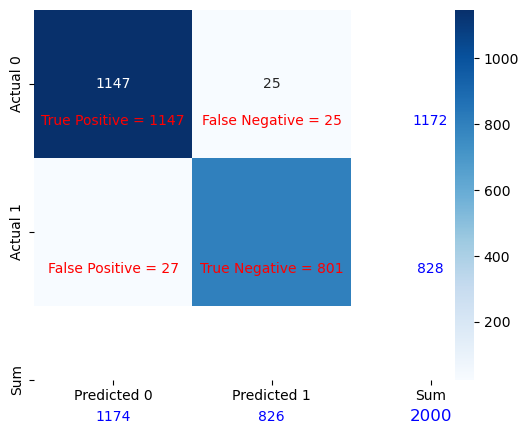

In [267]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Call a method predict by using an object classifier 'cls_svm'
y_predict = cls_svm.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Define labels for the confusion matrix
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']

# Create a heatmap with annotations and sum of rows/columns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Sum'], yticklabels=['Actual 0', 'Actual 1', 'Sum'])

# Add labels for TP, FP, TN, FN
for i in range(len(labels)):
    plt.text(i % 2 + 0.5, int(i / 2) + 0.75, str(labels[i]) + " = " + str(cm.flatten()[i]), color='red', fontsize=10, ha='center', va='center')

# Add sum of rows and columns
for i in range(2):
    plt.text(2.5, i + 0.75, str(cm.sum(axis=1)[i]), color='blue', fontsize=10, ha='center', va='center')
    plt.text(i + 0.5, 2.75, str(cm.sum(axis=0)[i]), color='blue', fontsize=10, ha='center', va='center')

# Add overall sum
plt.text(2.5, 2.75, str(cm.sum()), color='blue', fontsize=12, ha='center', va='center')

# Show the plot
plt.show()


## What does the confusion_matrix information result mean?
Out of 2000 students we predicted that 1174 would fail and 826 would pass. 

## Hyperparameter Tuning
Test a number of parameters to discover which is optimal. The parametes chosen are:
- choice of kernal
- Level of "C" 
- Level of Gamma 

In [292]:
#create a KFold with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [295]:
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                  'C': [1, 10, 100, 1000],
                  'kernel': ['linear', 'rbf', 'poly']}]

In [296]:
Model = svm.SVC(kernel="linear")  #Model

In [297]:
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = Model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True) 

In [298]:
# fit the model
model_cv.fit(X_train, y_train)       

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   3.1s
[CV] END .......................C=1, gamma=0.01

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['linear', 'rbf', 'poly']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [299]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.168746,0.039644,0.017531,0.002122,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.962857,0.977143,...,0.970286,0.004836,8,0.972321,0.968571,0.969464,0.970714,0.971071,0.970429,0.001301
1,0.178298,0.004366,0.091067,0.003188,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.964286,0.973571,...,0.969429,0.003736,27,0.972321,0.971429,0.970179,0.972143,0.972321,0.971679,0.000819
2,3.931864,0.782435,0.023686,0.010490,1,0.01,poly,"{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}",0.961429,0.972857,...,0.969286,0.004333,28,0.973393,0.971964,0.971964,0.973036,0.973036,0.972679,0.000598
3,0.138896,0.007275,0.015700,0.000742,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.962857,0.977143,...,0.970286,0.004836,8,0.972321,0.968571,0.969464,0.970714,0.971071,0.970429,0.001301
4,0.279425,0.119289,0.154022,0.064684,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.961429,0.970714,...,0.967857,0.004403,31,0.970179,0.967321,0.967143,0.967857,0.967679,0.968036,0.001101
5,0.198920,0.084179,0.029208,0.012720,1,0.001,poly,"{'C': 1, 'gamma': 0.001, 'kernel': 'poly'}",0.963571,0.975714,...,0.970286,0.004751,8,0.972143,0.969107,0.970179,0.970893,0.971071,0.970679,0.001006
6,0.144986,0.006134,0.016564,0.002319,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.962857,0.977143,...,0.970286,0.004836,8,0.972321,0.968571,0.969464,0.970714,0.971071,0.970429,0.001301
7,0.414522,0.114874,0.204086,0.026823,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.947857,0.947143,...,0.947429,0.004300,35,0.948750,0.947500,0.948393,0.948036,0.948214,0.948179,0.000413
8,0.319722,0.134223,0.065772,0.025247,1,0.0001,poly,"{'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}",0.936429,0.933571,...,0.934714,0.003213,36,0.934643,0.935000,0.933929,0.935536,0.935179,0.934857,0.000546
9,0.604635,0.235779,0.024421,0.011007,10,0.01,linear,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}",0.962857,0.977857,...,0.970286,0.005002,8,0.972321,0.968750,0.968929,0.970714,0.971071,0.970357,0.001351


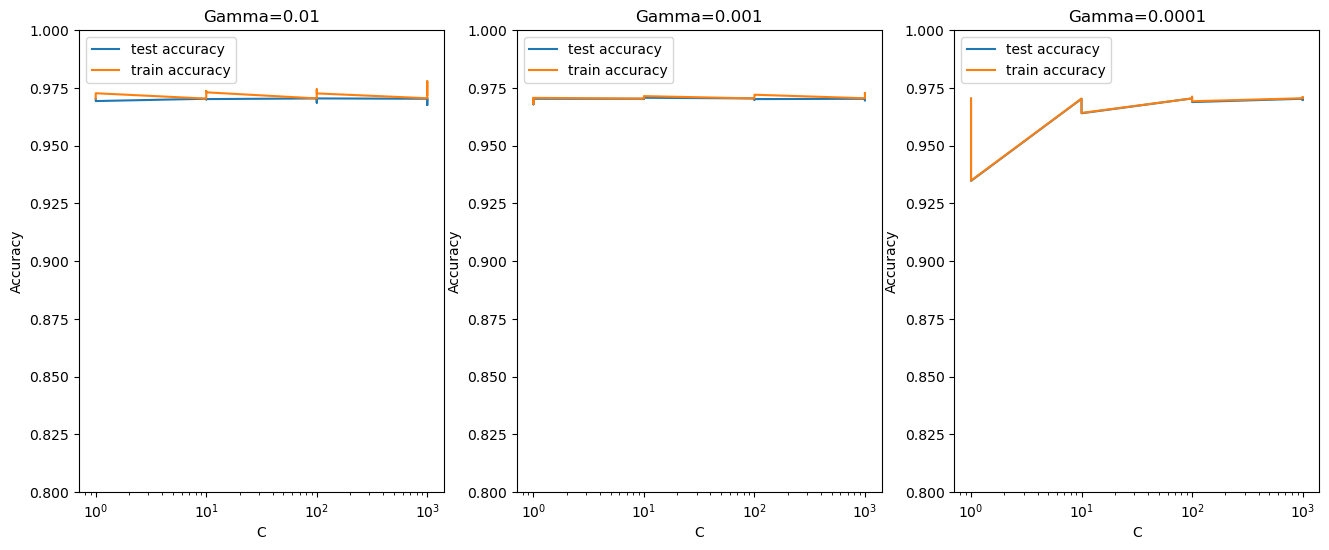

In [300]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [301]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9707142857142858 corresponding to hyperparameters {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}


## #Regression Models 

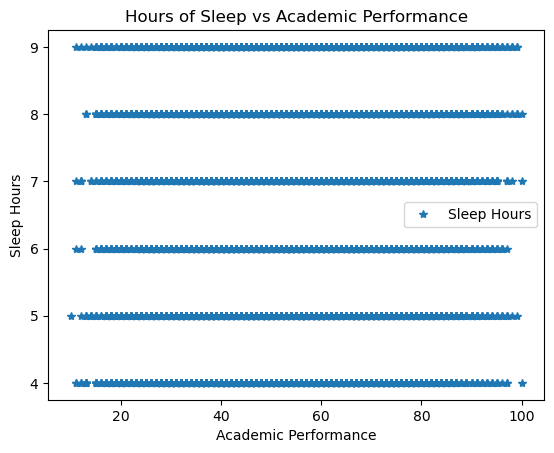

In [127]:
df_SPSleepPer.plot(x='Performance Index', y='Sleep Hours', style='*')
plt.title('Hours of Sleep vs Academic Performance')
plt.xlabel('Academic Performance')
plt.ylabel('Sleep Hours')
plt.show()

In [128]:
# Split the dataset into X and y columns
X = df_SPSleepPer.iloc[:, :-1].values            # Independent variables
y = df_SPSleepPer.iloc[:, 1].values              # Dependent variable

In [129]:
X

array([[9],
       [4],
       [7],
       ...,
       [8],
       [7],
       [8]], dtype=int64)

In [130]:
y

array([91., 65., 45., ..., 74., 95., 64.])

In [131]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [132]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10000, 1), (10000,), (8000, 1), (2000, 1), (8000,), (2000,))

In [133]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [134]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.001404426397997416
STD:  0.0031814703671015935




In [135]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

50.92290552842073
[0.63970627]


In [136]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
# y_pred

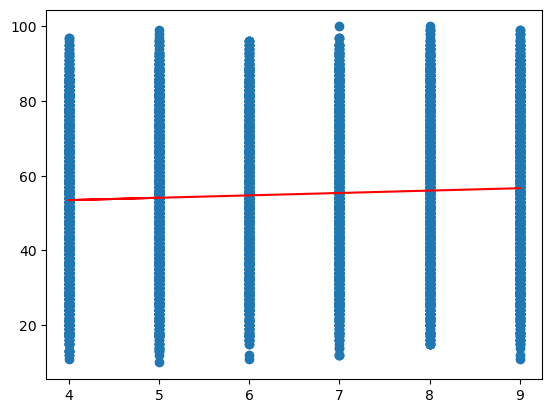

In [137]:
# Show the plotted values
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [138]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,53.0,56.680262
1,50.0,53.481731
2,80.0,54.121437
3,24.0,54.761143
4,64.0,54.121437


In [139]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 15.529829309291152
Mean Squared Error: 345.0333842350917
Root Mean Squared Error: 18.5750742726669
R2 score: -0.0027055507057760497


## Linear Regression with Hours of Study as the Independent variable

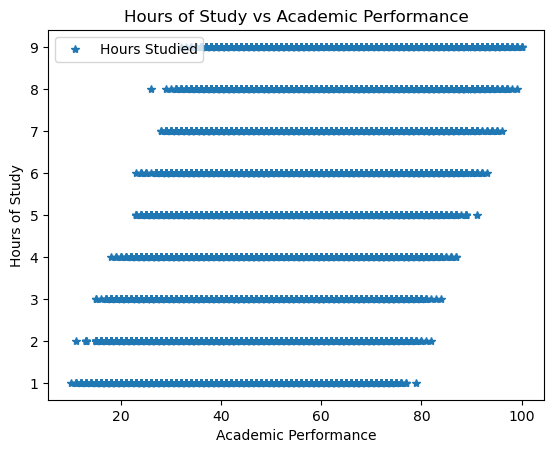

In [140]:
df_SPHSPer.plot(x='Performance Index', y='Hours Studied', style='*')
plt.title('Hours of Study vs Academic Performance')
plt.xlabel('Academic Performance')
plt.ylabel('Hours of Study')
plt.show()

In [141]:
 # Split the dataset into X and y columns
X = df_SPHSPer.iloc[:, :-1].values            # Independent variables
y = df_SPHSPer.iloc[:, 1].values              # Dependent variable

In [142]:
X

array([[7],
       [4],
       [8],
       ...,
       [6],
       [9],
       [7]], dtype=int64)

In [143]:
y

array([91., 65., 45., ..., 74., 95., 64.])

In [144]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [145]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10000, 1), (10000,), (8000, 1), (2000, 1), (8000,), (2000,))

In [146]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [147]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.14082925016272108
STD:  0.014626519917461157




In [148]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

41.09137202718477
[2.82005292]


In [149]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
# y_pred

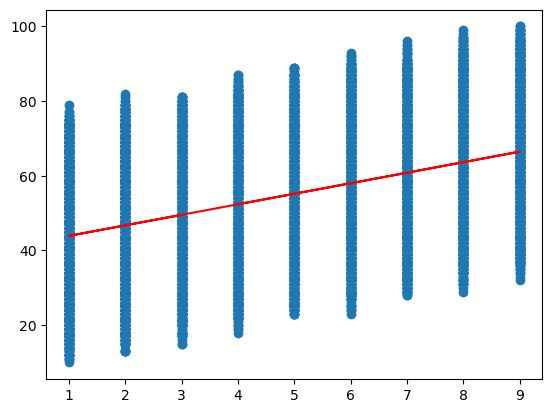

In [150]:
# Show the plotted values
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [151]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,53.0,52.371584
1,50.0,63.651795
2,80.0,58.011690
3,24.0,43.911425
4,64.0,46.731478


In [152]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 14.88202462644476
Mean Squared Error: 300.0411017393494
Root Mean Squared Error: 17.321694540065916
R2 score: 0.128047047328808


Linear Regression with Previous Scores as the Independent variable

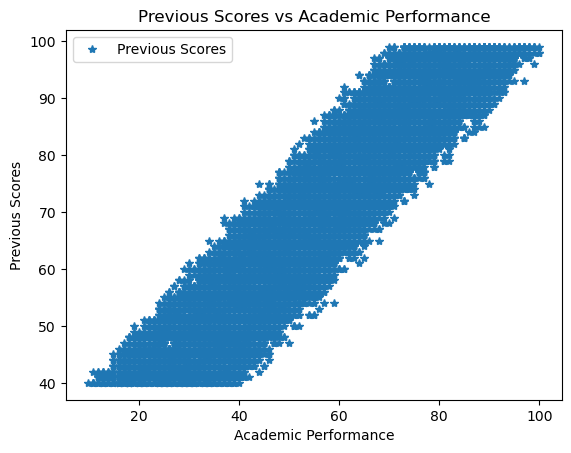

In [153]:
df_SPPSPer.plot(x='Performance Index', y='Previous Scores', style='*')
plt.title('Previous Scores vs Academic Performance')
plt.xlabel('Academic Performance')
plt.ylabel('Previous Scores')
plt.show()

In [154]:
# Split the dataset into X and y columns
X = df_SPPSPer.iloc[:, :-1].values            # Independent variables
y = df_SPPSPer.iloc[:, 1].values              # Dependent variable

In [155]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [156]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10000, 1), (10000,), (8000, 1), (2000, 1), (8000,), (2000,))

In [157]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [158]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.8397090739092226
STD:  0.00818414928346299




In [159]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

-15.506091435073245
[1.01765602]


In [160]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
# y_pred

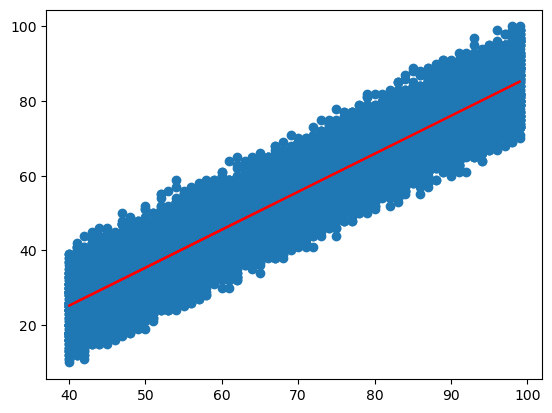

In [161]:
# Show the plotted values
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [162]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,53.0,52.676862
1,50.0,45.553270
2,80.0,76.082950
3,24.0,36.394365
4,64.0,76.082950


In [163]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 6.5684993751275815
Mean Squared Error: 59.906453523970555
Root Mean Squared Error: 7.739925937886651
R2 score: 0.8259051552221549
